# Titanic Survival Analysis

### Introduction

In this analysis, I am interested in how the sex and ticket class of the passenger affected passengers' chance of survival. To that end, I grouped 'pclass' into a new field called 'TicketClass' to create a binary column. I am interested in 1st class passengers vs 2nd/3rd class passengers to see if wealth, in addition to sex, had a significant impact on chances of survival.


### Analysis

In [118]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/Users/drewmcknight1/Desktop/MISY630/Fall 2020 Course Files/Assignments/titanic.csv')
df.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,100,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,0,London / Paris
1,101,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,0,London / Paris
2,118,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,0,NaN
3,257,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,0,"New York, NY"
4,281,1,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C,1,0,"Newark, NJ"


In [119]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passengerid,1309.0,655.000000,378.020061,1.0000,328.0000,655.0000,982.000,1309.0000
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,1309.0,14.864782,55.197471,0.0000,0.0000,0.0000,0.000,328.0000


Checking for null values

In [120]:
df.isnull().sum()

passengerid       0
pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
boat              0
body              0
destination     564
dtype: int64

In [121]:
df['fare'].groupby(df['pclass']).mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

The above confirms 1st ticket class is associated with a higher ticket fare based on the average.

In [122]:
df2 = df[['sex', 'pclass', 'survived']].copy()
df2 = df2.dropna()
df2.shape

(1309, 3)

In [123]:
df2.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

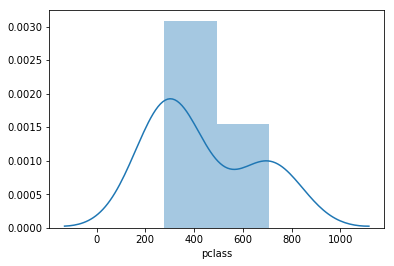

In [124]:
sns.distplot(df2.pclass.value_counts())

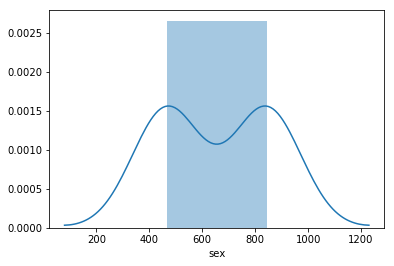

In [125]:
sns.distplot(df2.sex.value_counts())

The above histograms show the distribution of passengers based on ticket class and passengers based on sex, respectively.

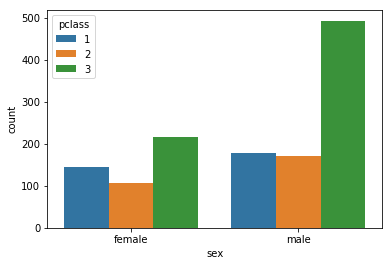

In [165]:
sns.countplot(x="sex", hue="pclass", data=df2)

As we can see in the above graph, vast majority of passengers were male in the 3rd class. I found it interesting that 2nd class had the least amount of passengers. Perhaps this an indication of the wealth gap at the time between the rich and poor, and smaller middle class.

In [127]:
df2['survived'].groupby(df2['pclass']).describe().transpose()

pclass,1,2,3
count,323.000000,277.000000,709.000000
mean,0.619195,0.429603,0.255289
std,0.486338,0.495915,0.436331
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [128]:
df2['survived'].groupby(df2['sex']).describe().transpose()

sex,female,male
count,466.000000,843.000000
mean,0.727468,0.190985
std,0.445741,0.393310
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


Our mean indicates women had a higher chance of survival than the men since 0.72 > 0.19

In [129]:
pd.crosstab(df2.survived, df2.pclass)

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


In [151]:
pd.crosstab(df2.survived, df2.sex)

sex,female,male
survived,,
0,127,682
1,339,161


In [152]:
df2.loc[df.sex == 'male', 'SexCode'] = 1
df2.loc[df.sex == 'female', 'SexCode'] = 0

In [153]:
df2.SexCode.value_counts() #1 is men, 0 is women

1.0    843
0.0    466
Name: SexCode, dtype: int64

In [154]:
df2.loc[df.pclass == 1, 'TicketClass'] = 1 #first class ticket holders
df2.loc[(df.pclass == 2) | (df.pclass == 3), 'TicketClass'] = 0 #all other ticket holders
df2.TicketClass.value_counts()

0.0    986
1.0    323
Name: TicketClass, dtype: int64

In [155]:
df['fare'].groupby(df2['TicketClass']).mean()

TicketClass
0.0    15.517850
1.0    87.508992
Name: fare, dtype: float64

Average price of 1st class (0) and 2nd/3rd class (1) tickets

In [156]:
y = df2['survived']
X = df2[['TicketClass', 'SexCode']]

In [157]:
y.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [158]:
survival = tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
survival = survival.fit(X, y)

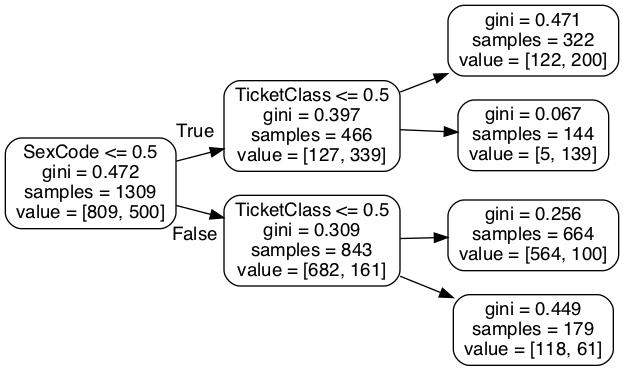

In [159]:
dot_data = StringIO()  
tree.export_graphviz(survival, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

SexCode:
 * Male = 1
 * Female = 0
 
TicketClass:
 * 1st class = 1
 * 2nd/3rd class = 0

Starting at the first node on the left side, the value in the node indicates [died, lived].  Overall, 809/(809+500) (62%) of all passengers died. For the upper path, the SexCode <= 0.5 (i.e. women) is True. For the lower path, samples consist of only men since SexCode <= 0.5 is False

At this second stage, you can tell 466 passengers were women for the upper path, and 843 were men for the lower path.  

At the upper node from the female branch, when the condition TicketClass <= 0.5 is True, the female passengers had a 2nd or 3rd class ticket.  If we take the 'true' path again, we find that 122/(122+200) or 37.9% of female 2nd/3rd class ticket holders died. For female 1st class passengers, we see that only 5/(5+139) or 3.5% female 1st class ticket holders died.

At the lower node from the male branch, when the condition TicketClass <= 0.5 is True, the male passengers had a 2nd or 3rd class ticket. If we take the 'true' path again, we find that 564/(564+100) or 84.9% of male 2nd/3rd class ticket holders died. For male 1st class passengers, we see that 118/(118+61) or 65.9% male 1st class ticket holders died.  

Our gini score, or entropy which is a measure of disparity, decreased as we went from the first level to the second. The score increases or decreases depending on the path taken after the second level.

Overall, it seems wealth played a partial role in disparities in survival rate.

In [160]:
survival.feature_importances_

array([0.16352035, 0.83647965])

The above indicates sex (83.6%) is more important than wealth (16.4%) in determining survival.

In [161]:
accuracy = survival.score(X,y) 
print("This decision tree is {:.2f}% accurate.".format(accuracy*100))

This decision tree is 78.00% accurate.


In [172]:
df2['predictions'] = survival.predict(X)

In [173]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, df2['predictions'])
cm

array([[682, 127],
       [161, 339]])

In [174]:
df2.head(10)

,sex,pclass,survived,SexCode,TicketClass,predictions
0,female,1,1,0.0,1.0,1
1,male,1,1,1.0,1.0,0
2,female,1,1,0.0,1.0,1
3,male,1,1,1.0,1.0,0
4,male,1,1,1.0,1.0,0
5,female,1,1,0.0,1.0,1
6,female,1,1,0.0,1.0,1
7,female,1,1,0.0,1.0,1
8,female,1,1,0.0,1.0,1
9,female,1,1,0.0,1.0,1


In [175]:
person1 = survival.predict_proba([[1, 1]])
person2 = survival.predict_proba([[1, 0]])
person3 = survival.predict_proba([[0, 1]])

print(person1)
print(person2)
print(person3)

[[0.65921788 0.34078212]]
[[0.03472222 0.96527778]]
[[0.84939759 0.15060241]]


In [176]:
person1 = survival.predict([[1, 1]])
person2 = survival.predict([[1, 0]])
person3 = survival.predict([[0, 1]])

print(person1)
print(person2)
print(person3)

[0]
[1]
[0]


* Person 1 (first class male) has a 34% chance of survival.
* Person 2 (first class female) has a 96.5% chance of survival.
* Person 3 (2nd/3rd class male) has a 15% chance of survival.

I believe my model predicted the above due to the fact in most emergency situations, women and children tend to be the first people to be saved. This would explain why women in general had a higher survival rate than the men. The disparity in survival between the 1st class vs. 2nd/3rd class, regardless of sex could be due to 1st class passengers being prioritized for the life boats since they paid more for the fare.